機械学習の演習課題

回帰モデルで燃費予想を行う

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

生データをデータの読み込み、表示する

In [2]:
#ファイル選択
df_car_consume = pd.read_csv(r"..\car-consume\measurements.csv")

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,"16,2","4,4",39,"24,5",17,ac,SP98,1,0,0,NaN,NaN
379,"16,7","3,8",44,"24,5",23,sun,SP98,0,0,1,NaN,NaN
380,"8,3",5,52,"24,5",27,NaN,SP98,0,0,0,NaN,NaN
381,"5,5","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
382,"13,6","3,7",33,"24,5",28,sun,SP98,0,0,1,NaN,NaN
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


カンマとピリオドの表記が異なっているため、直さないといけない。
replace(',', '.')を使う

In [3]:
#入れ替え
df_car_consume = pd.read_csv(r"..\car-consume\measurements.csv")
df_car_consume = df_car_consume.replace(',','.',regex = True)
df_car_consume["distance"] = df_car_consume["distance"].astype(np.float64)
df_car_consume["consume"] = df_car_consume["consume"].astype(np.float64)
df_car_consume["temp_inside"] = df_car_consume["temp_inside"].astype(np.float64)

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


燃料種も追加変更してみる。

In [4]:
#ガス種コピー
df_car_consume["gas_type_int"] = df_car_consume["gas_type"].replace({'E10':1,"SP98":0})

#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0


欠損値が無いか確認を行う。 count()関数なり。

In [5]:
df_car_consume.count()

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
gas_type_int     388
dtype: int64

temp_insideに欠損値があるみたい。
とりあえず、平均値で埋めることにしてみる。

In [6]:
#平均値でリプレイスする
ave = df_car_consume["temp_inside"].mean()
df_car_consume["temp_inside"] = df_car_consume["temp_inside"].fillna(ave)
df_car_consume.count()

distance         388
consume          388
speed            388
temp_inside      388
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
gas_type_int     388
dtype: int64

In [7]:
#頭と尻の10行づつ表示
display(df_car_consume.head(10))
display(df_car_consume.tail(10))

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,1
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,1
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,1
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,1
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN,1
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN,1
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN,1
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN,1
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN,1


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,gas_type_int
378,16.2,4.4,39,24.5,17,ac,SP98,1,0,0,NaN,NaN,0
379,16.7,3.8,44,24.5,23,sun,SP98,0,0,1,NaN,NaN,0
380,8.3,5.0,52,24.5,27,NaN,SP98,0,0,0,NaN,NaN,0
381,5.5,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
382,13.6,3.7,33,24.5,28,sun,SP98,0,0,1,NaN,NaN,0
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN,0
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN,0


こんな↑感じのデータ。

各カラムの意味は以下の通り。

・distance is the distance inkilometers i was driving.
　つまり、 運転した距離（km）

・consume is the sonsumption in liters per 100 kilometers as seen in the display.
　つまり、ディスプレイ表示上の消費した燃料量（ℓ/100km）

・speed is the average speed.つまり、平均速度

・temp_inside is the setting of the heating or "NaN" if it was turned off.
　つまり、暖房の設定値であり、値がNaNの場合は暖房OFFにしている

・temp_outside is the temperature outside, taken at the end of the ride.
　つまり、降車する際の外気温。

・specials is a remark if it was raining, snowing or if the climatization was on ("AC").
　つまり、雨や雪または気候変動によってAC(エアコン）をオンにしている場合に書き込んでいる

・gas type is the gas type used during the last refill.
　つまり、最後に補給したガス種別

・AC is one hot encoded, the special "AC". 1 for on, 0 for off.
　つまり、ACは、「AC（エアコン）」のエンコード値です。 オンの場合は1、オフの場合は0。

・rain is one-hot-encoded, the special "rain" and "snow". 1 for it was raining/snowing, 0 for it
was good weather.
　つまり、「雨」と「雪」のエンコード値です。 雨/雪が降っていた場合は1、0は良い天気。

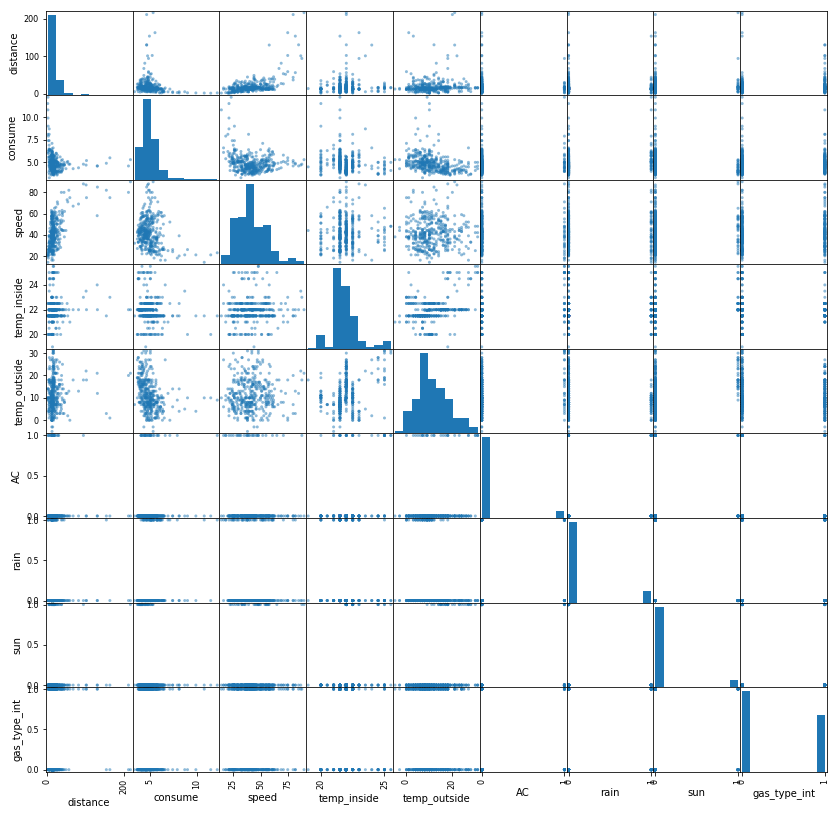

In [8]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_car_consume, figsize=(14,14))
plt.show()

In [9]:
# 相関係数を確認
df_car_consume.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type_int
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.022761
gas_type_int,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,1.000000


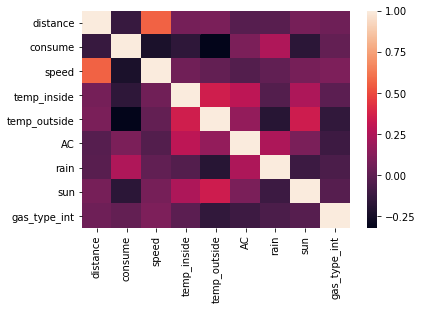

In [10]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_car_consume.corr())
plt.show()

相関を見る限り、燃費である目的変数「consume」に関係していると考えられる
説明変数は次の通り。

speed>>>-0.23

temp_outside>>>-0.32

rain>>>0.25

DAY1では3つのデータで予測していた。

まずDAY1の復習として、DAY1でやった学習モデルを作って評価してみる。

In [11]:
X_day1, y = df_car_consume[["temp_outside", "speed", "rain"]].values, df_car_consume["consume"].values
#consumeと説明変数3つとの線形回帰

regr = LinearRegression(fit_intercept=True)
regr.fit(X_day1, y)#学習（生データ全部で学習）

from sklearn.model_selection import train_test_split

#学習データを80％、テストデータは20％とする
X_train_day1, X_test_day1, y_train, y_test = train_test_split(X_day1, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

y_pred_test = regr.predict(X_test_day1)#テストデータでyを予測
squared_error = 0.5 * np.sum((y_test - y_pred_test) ** 2)#二乗誤差出す
print('DAY1モデルでテストデータの二乗誤差 = {:.3f}'.format(squared_error))
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  
# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )
# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

DAY1モデルでテストデータの二乗誤差 = 25.676
MSE = 0.658
MAE = 0.657
RMSE = 0.811


次に、DAY2で行った結果を以下に示す。

In [12]:
# 標準化操作
from sklearn.preprocessing import StandardScaler#インポート
X_day2, y = df_car_consume[["temp_outside", "speed", "rain"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day2, X_test_day2, y_train, y_test = train_test_split(X_day2, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train_day2)
X_test_stand  = stdsc.transform(X_test_day2)#fitは上のを引き継ぐ

#consumeと説明変数3つとの線形回帰
# 係数を求める
from sklearn.linear_model import Ridge,Lasso #正則化項付き最小二乗法を行うためのライブラリ
l2regr = Ridge(alpha = 38)
l2regr.fit(X_train_stand, y_train)

# テストデータに対する予測を実行
y_pred_test = l2regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('DAY2モデルでテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )


DAY2モデルでテスト時の二乗誤差 = 25.579
MSE = 0.656
MAE = 0.659
RMSE = 0.81


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


次にDAY3でやった内容を1つづつ実施する。

DAY2まではフィルタ法で勝手に説明変数を3つ選んで予測に用いていた。
そこでステップワイズ法を用いて説明変数の取捨選択を行ってみたいと思う。

まず線形回帰（リッジ回帰）で行うこととして実施したいと思う。

Feature ranking: 
[6 1 3 1 2 1 4 5]


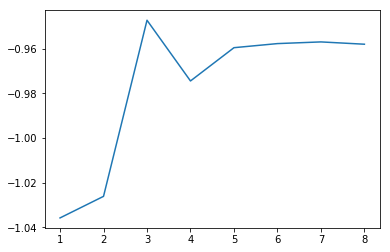

In [13]:
#説明変数はconsume以外の値を選択する。
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain",
                            "sun",
                            "gas_type_int"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

from sklearn.feature_selection import RFECV#ステップワイズ法のをインポート

#ステップワイズ法による特徴選択
l2regr = Ridge(alpha = 38)#alpha値はDAY2そのまんま
# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_squared_errorを評価指標に指定
l2regr_rfecv = RFECV(l2regr, cv = 10, scoring = 'neg_mean_squared_error')

l2regr_rfecv.fit(X_train_stand, y_train)#特徴選択を実行する

# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(l2regr_rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(l2regr_rfecv.grid_scores_) + 1), l2regr_rfecv.grid_scores_)
plt.show()

説明変数の重要度ランキングは以下の通り

1位："speed""temp_outside""rain"

2位："AC"

3位："temp_inside"

4位："sun"

5位："gas_type_int"

6位："distance"

MSEが良いのは説明変数3つ選択時である。
続いて説明変数5つ選択時で、その次に6つ選択時と続く。

説明変数を3つで行うと今までと同じ結果になりそう。
ということで説明変数を4つ　～　6つにして実施したいと考える。

In [14]:
#必要な説明変数のみ抽出する
X_day3, y = df_car_consume[["speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

l2regr = Ridge(alpha = 38)
l2regr.fit(X_train_stand, y_train)

# テストデータに対する予測を実行
y_pred_test = l2regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('DAY3モデルでテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )


DAY3モデルでテスト時の二乗誤差 = 25.506
MSE = 0.654
MAE = 0.661
RMSE = 0.809


RMSEの値をDAY1とDAY2とで比較すると値が僅かに良くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.809

念のため、L2正則化のλの値が最適な値なのか確認してみる。

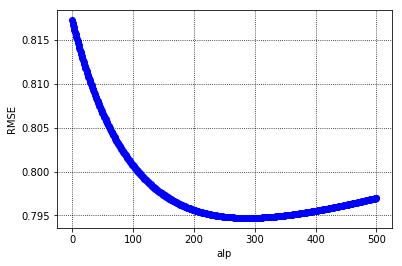

In [15]:
plt.ylabel("RMSE")
plt.xlabel("alp")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

for i in range(501):
    alp = i
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    #print("☆λ = {}のとき☆".format(alp))
    l2regr = Ridge(alpha = alp)
    l2regr.fit(X_train_stand, y_train)
    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    #print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))
    
    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test) 
    #print("MSE = %s"%round(mse, 4) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    #print("MAE = %s"%round(mae, 4) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    #print("RMSE = %s"%round(rmse, 4) )
    #print()
    
    #グラフに重ねて表示する
    plt.plot(alp, rmse, 'o',color='blue')
    
plt.show()

見ると、λ＝290のときRMSE値が最小となっていることが分かる。

In [16]:
#λ＝290にして値を確認
l2regr = Ridge(alpha = 290)
l2regr.fit(X_train_stand, y_train)

# テストデータに対する予測を実行
y_pred_test = l2regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('DAY3モデル(λ＝290)でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )


DAY3モデル(λ＝290)でテスト時の二乗誤差 = 24.631
MSE = 0.632
MAE = 0.664
RMSE = 0.795


最終的にRMSEの値をDAY1とDAY2とで比較すると値が僅かに良くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.795

説明変数を4つにして考えてみる。

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


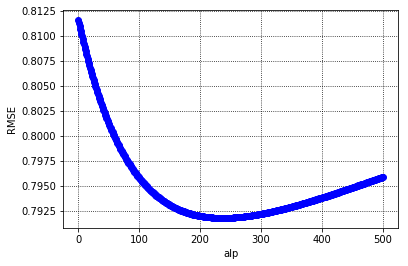

In [17]:
#必要な説明変数のみ抽出する
X_day3, y = df_car_consume[["speed",
                            "temp_outside",
                            "AC",
                            "rain"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

plt.ylabel("RMSE")
plt.xlabel("alp")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

for i in range(501):
    alp = i
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    #print("☆λ = {}のとき☆".format(alp))
    l2regr = Ridge(alpha = alp)
    l2regr.fit(X_train_stand, y_train)
    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    #print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))
    
    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test) 
    #print("MSE = %s"%round(mse, 4) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    #print("MAE = %s"%round(mae, 4) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    #print("RMSE = %s"%round(rmse, 4) )
    #print()
    
    #グラフに重ねて表示する
    plt.plot(alp, rmse, 'o',color='blue')
    
plt.show()

説明変数が4つであればλ＝240のときにRMSEが最小となることが分かる。

In [18]:
#λ＝240にして値を確認
l2regr = Ridge(alpha = 240)
l2regr.fit(X_train_stand, y_train)

# テストデータに対する予測を実行
y_pred_test = l2regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('DAY3モデル(λ＝240)でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

DAY3モデル(λ＝240)でテスト時の二乗誤差 = 24.450
MSE = 0.627
MAE = 0.662
RMSE = 0.792


RMSEの値をDAY1とDAY2とで比較すると値が僅かに良くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.792


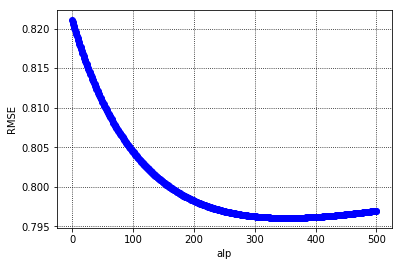

In [19]:
#必要な説明変数のみ抽出する
X_day3, y = df_car_consume[["speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain",
                            "sun"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

plt.ylabel("RMSE")
plt.xlabel("alp")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

for i in range(501):
    alp = i
    #consumeと説明変数3つとの線形回帰
    # 係数を求める
    #print("☆λ = {}のとき☆".format(alp))
    l2regr = Ridge(alpha = alp)
    l2regr.fit(X_train_stand, y_train)
    # テストデータに対する予測を実行
    y_pred_test = l2regr.predict(X_test_stand)
    squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
    #print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))
    
    # MSEを計算
    mse = mean_squared_error(y_test, y_pred_test) 
    #print("MSE = %s"%round(mse, 4) )  

    # MAEを計算
    mae = mean_absolute_error(y_test, y_pred_test) 
    #print("MAE = %s"%round(mae, 4) )

    # RMSEを計算
    rmse = np.sqrt(mse)
    #print("RMSE = %s"%round(rmse, 4) )
    #print()
    
    #グラフに重ねて表示する
    plt.plot(alp, rmse, 'o',color='blue')
    
plt.show()

説明変数が6つの時はλ＝350のときRMSEが最小となることが分かる。

In [20]:
#λ＝350にして値を確認
l2regr = Ridge(alpha = 350)
l2regr.fit(X_train_stand, y_train)

# テストデータに対する予測を実行
y_pred_test = l2regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('DAY3モデル(λ＝350)でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

DAY3モデル(λ＝350)でテスト時の二乗誤差 = 24.715
MSE = 0.634
MAE = 0.662
RMSE = 0.796


RMSEの値をDAY1とDAY2とで比較すると値が僅かに良くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.796（説明変数６つ）

線形回帰の結果をまとめると次の通り。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.792（説明変数４つ）

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.795（説明変数５つ）

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.796（説明変数６つ）

線形回帰（L2正則化込み）ではこちらの値が限界ではないかと考える。

次に決定木モデルで回帰解いてみる。

In [21]:
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeRegressor, export_graphviz

Feature ranking: 
[1 2 5 1 6 4 7 3]


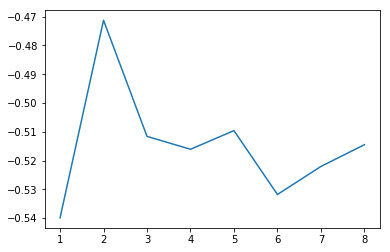

In [22]:
tree_reg = DecisionTreeRegressor(criterion='mse',
                                  max_depth=None,
                                  min_samples_split=2,#この数未満であれば葉となる
                                  min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない
                                  random_state=1234)

#説明変数はconsume以外の値を選択する。
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain",
                            "sun",
                            "gas_type_int"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

#ステップワイズ法による特徴選択
# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_squared_errorを評価指標に指定（分類ならaccuracy）
tree_reg_rfecv = RFECV(tree_reg, cv=10, scoring='neg_mean_squared_error')

tree_reg_rfecv.fit(X_train_stand, y_train)#特徴選択を実行する

# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(tree_reg_rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(tree_reg_rfecv.grid_scores_) + 1), tree_reg_rfecv.grid_scores_)
plt.show()

説明変数の重要度ランキングは以下の通り

1位："distance""temp_outside"

2位："speed"

3位："gas_type_int"

4位："rain"

5位："temp_inside"

6位："AC"

7位："sun"

RMSEが良いのは説明変数2つ選択時である。 続いて説明変数5つ選択時で、その次に3つ選択時と続く。

説明変数を2つと5つで行ってみる。


木モデル（変数5つ）でテスト時の二乗誤差 = 25.775
MSE = 0.661
MAE = 0.536
RMSE = 0.813


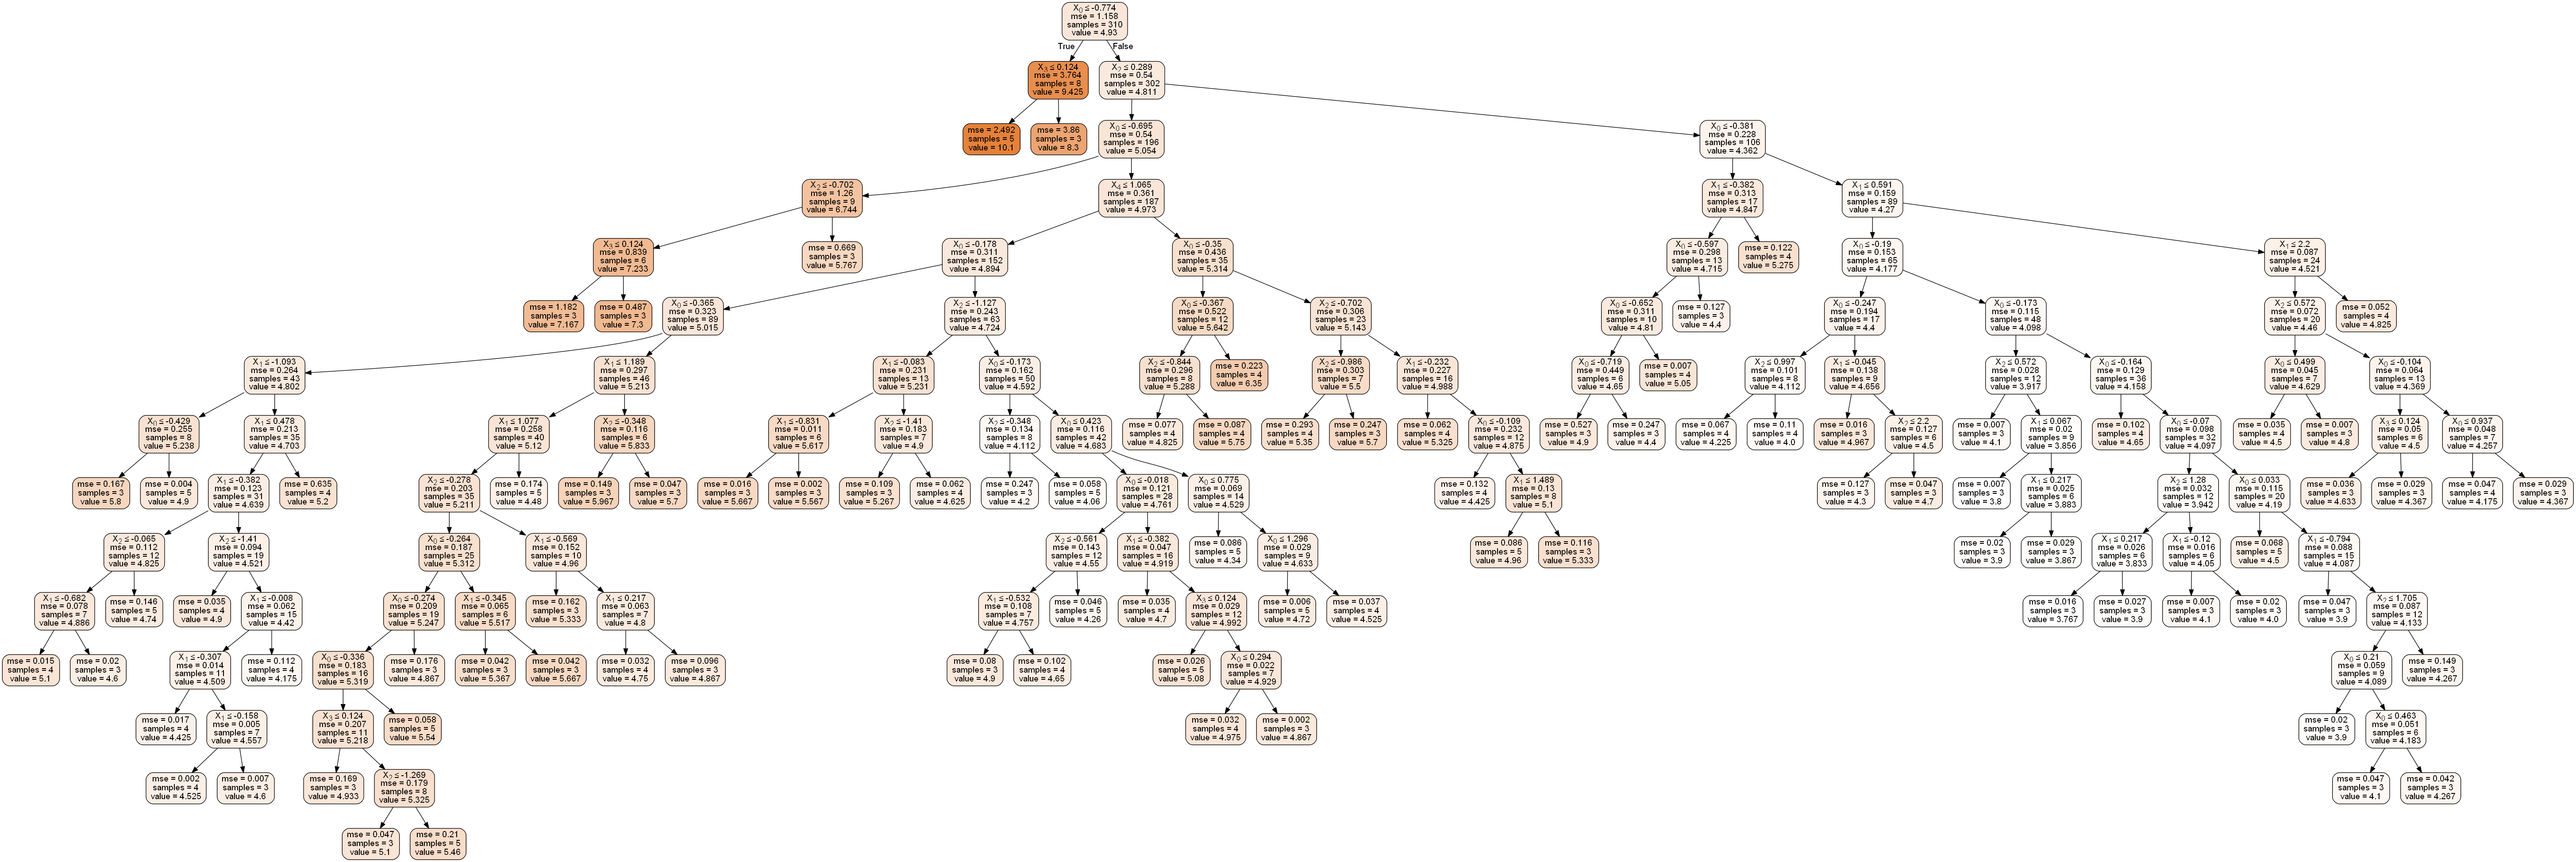

In [23]:
#必要な説明変数のみ抽出する
#説明変数5つで行う
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_outside",
                            "gas_type_int",
                            "rain"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

tree_reg = DecisionTreeRegressor(criterion='mse',
                                  max_depth=None,#深さは無限
                                  min_samples_split=2,#この数未満であれば葉となる
                                  min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない
                                  random_state=1234)

tree_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = tree_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('木モデル（変数5つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(tree_reg, out_file=dot_data,
                     filled=True, rounded=True,  
                     special_characters=True) 
tree_graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(tree_graph.create_png())

木モデル（変数3つ）でテスト時の二乗誤差 = 25.785
MSE = 0.661
MAE = 0.598
RMSE = 0.813


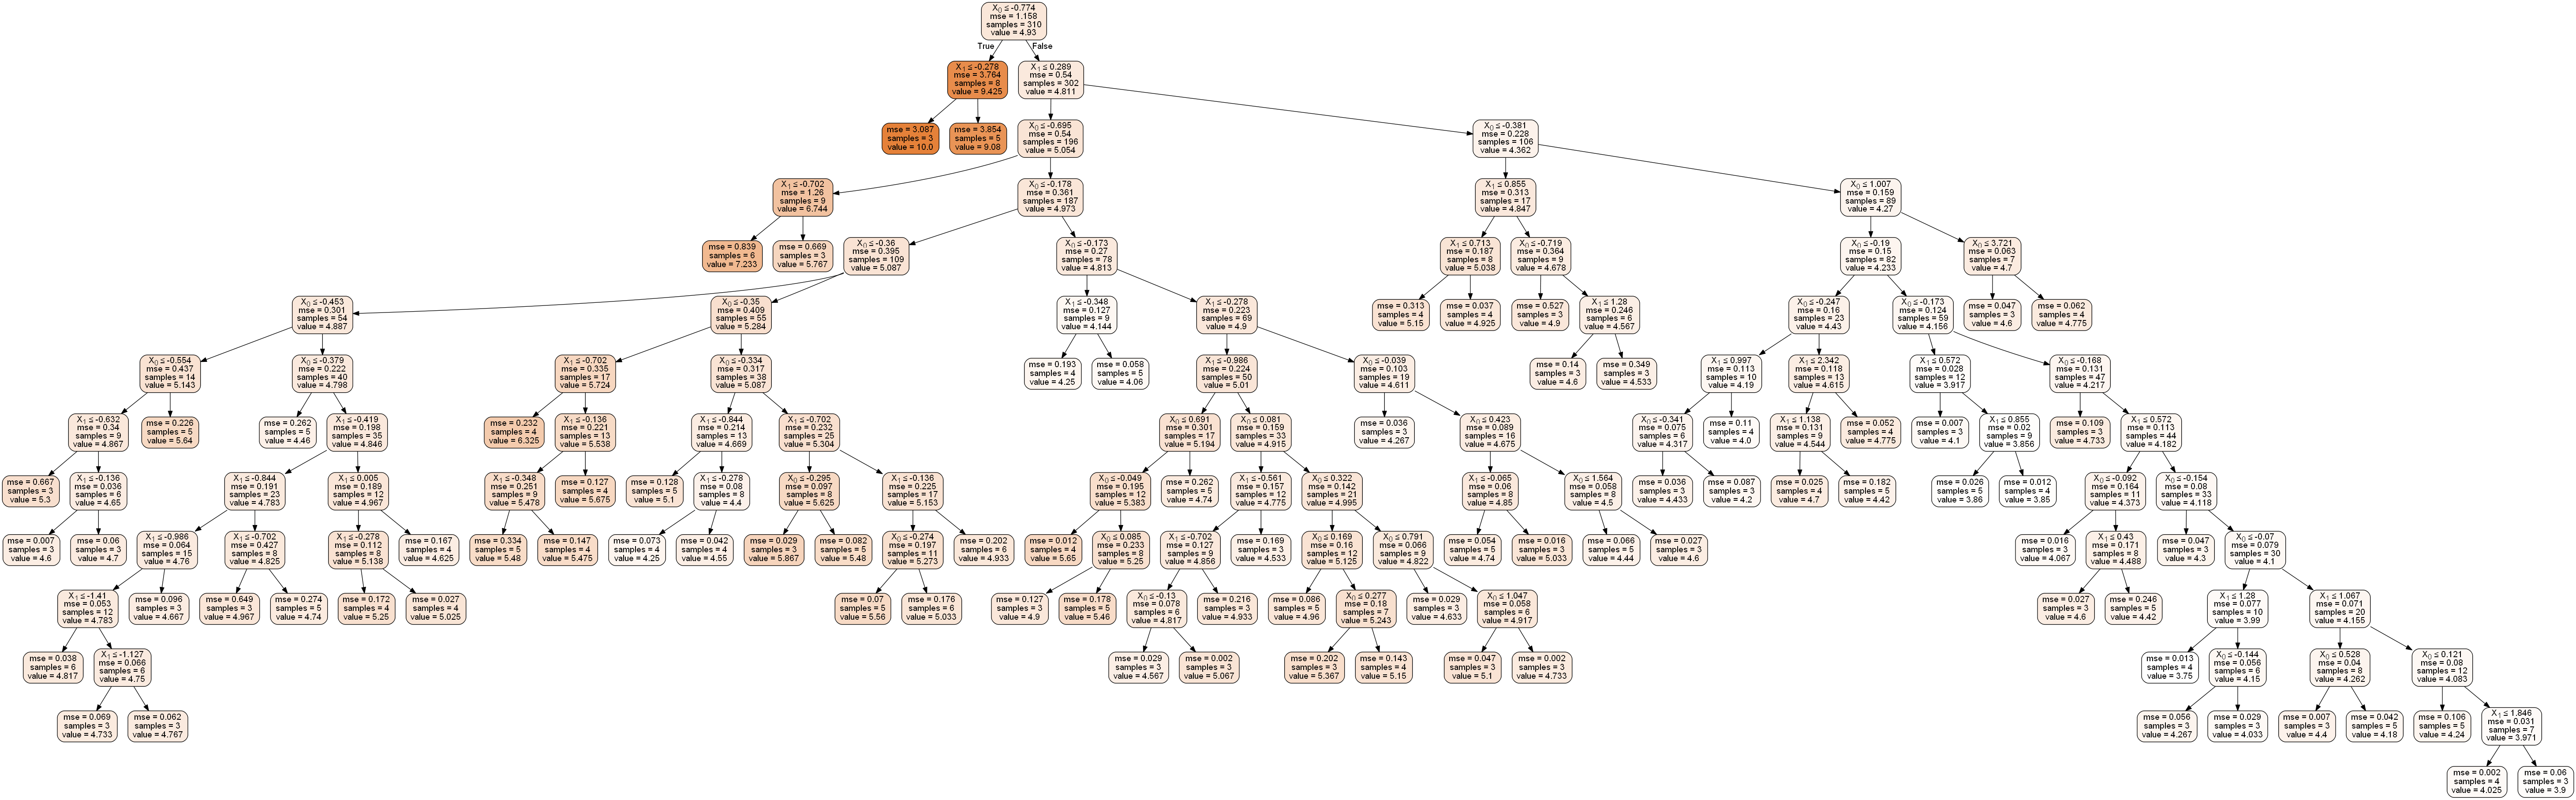

In [24]:
#必要な説明変数のみ抽出する
#説明変数2つで行う
X_day3, y = df_car_consume[["distance",
                            "temp_outside"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

tree_reg = DecisionTreeRegressor(criterion='mse',
                                  max_depth=None,#深さは無限
                                  min_samples_split=2,#この数未満であれば葉となる
                                  min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない
                                  random_state=1234)

tree_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = tree_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('木モデル（変数3つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(tree_reg, out_file=dot_data,
                     filled=True, rounded=True,  
                     special_characters=True) 
tree_graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(tree_graph.create_png())

RMSEの値をDAY1とDAY2とで比較すると値が悪くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.813(説明変数5)

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.813(説明変数2)

木モデル単体よりアンサンブル学習の方が汎化性能が上がると思うので、次にアンサンブル学習を実施する。

アンサンブル学習にはアダブーストを使用することにした。

Feature ranking: 
[1 1 1 1 2 4 5 3]


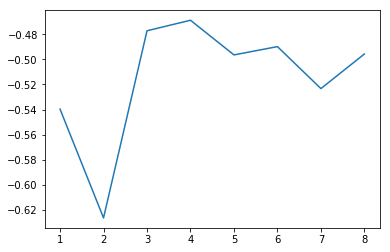

In [25]:
from sklearn.ensemble import AdaBoostRegressor#アダブーストをインポート

#決定木回帰のアダブースト
adab_reg = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse',
                                  max_depth=None,
                                  min_samples_split=2,#この数未満であれば葉となる
                                  min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない
                                  random_state=1234), n_estimators=10, random_state=1234)

#説明変数はconsume以外の値を選択する。
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain",
                            "sun",
                            "gas_type_int"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

#ステップワイズ法による特徴選択
# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_squared_errorを評価指標に指定（分類ならaccuracy）
adab_reg_rfecv = RFECV(adab_reg, cv=10, scoring='neg_mean_squared_error')

adab_reg_rfecv.fit(X_train_stand, y_train)#特徴選択を実行する

# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(adab_reg_rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(adab_reg_rfecv.grid_scores_) + 1), adab_reg_rfecv.grid_scores_)
plt.show()

説明変数の重要度ランキングは以下の通り

1位："distance""speed""temp_inside""temp_outside"

2位："AC"

3位："gas_type_int"

4位："rain"

5位："sun"

RMSEが良いのは説明変数4つ選択時である。 続いて説明変数3つ選択時で、その次に5つ選択時と続く。

説明変数を4つ、5つで行ってみる。(1位が４つあるので説明変数を3つに絞るのは忍びない)


In [26]:
#必要な説明変数のみ抽出する
#説明変数5つで行う
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "AC"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

adab_reg = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse',
                                  max_depth=None,#深さは無限
                                  min_samples_split=2,#この数未満であれば葉となる
                                  min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない
                                  random_state=1234), n_estimators=10, random_state=1234)

adab_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = adab_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('アダブースト（中身は木モデル、変数5つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

アダブースト（中身は木モデル、変数5つ）でテスト時の二乗誤差 = 28.145
MSE = 0.722
MAE = 0.491
RMSE = 0.85


In [27]:
#必要な説明変数のみ抽出する
#説明変数4つで行う
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

adab_reg = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse',
                                  max_depth=None,#深さは無限
                                  min_samples_split=2,#この数未満であれば葉となる
                                  min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない
                                  random_state=1234), n_estimators=10, random_state=1234)

adab_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = adab_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('アダブースト（中身は木モデル、変数4つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

アダブースト（中身は木モデル、変数4つ）でテスト時の二乗誤差 = 17.569
MSE = 0.45
MAE = 0.453
RMSE = 0.671


RMSEの値をDAY1とDAY2とで比較すると値が良くなったり悪くなったりした。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.671（説明変数４）

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.85（説明変数５）



線形回帰モデルで、一番良い結果が得られた条件を使ってのアンサンブル学習（アダブースト）を行ってみる。

In [28]:
#線形回帰のアダブースト
adab_reg = AdaBoostRegressor(Ridge(alpha = 240),
                             n_estimators=10, random_state=1234)

#説明変数はconsume以外の値を選択する。
X_day3, y = df_car_consume[["speed",
                            "temp_outside",
                            "AC",
                            "rain"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

adab_reg.fit(X_train_stand, y_train)#特徴選択を実行する

#テストデータに対する予測を実行
y_pred_test = adab_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('アダブースト（中身は線形回帰モデル、変数4つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

アダブースト（中身は線形回帰モデル、変数4つ）でテスト時の二乗誤差 = 34.456
MSE = 0.883
MAE = 0.79
RMSE = 0.94


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


RMSEの値をDAY1とDAY2とで比較すると値が悪くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.94（説明変数４）

次に、ランダムフォレストを実行してみる。

Feature ranking: 
[1 1 2 1 4 3 6 5]


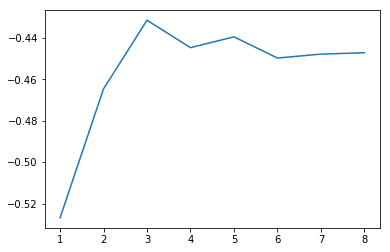

In [29]:
from sklearn.ensemble import RandomForestRegressor

#決定木回帰のランダムフォレスト
rand_reg = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse",
                                 min_samples_leaf=3, min_samples_split=2, random_state=1234)

#説明変数はconsume以外の値を選択する。
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain",
                            "sun",
                            "gas_type_int"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

#ステップワイズ法による特徴選択
# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_squared_errorを評価指標に指定（分類ならaccuracy）
rand_reg_rfecv = RFECV(rand_reg, cv=10, scoring='neg_mean_squared_error')

rand_reg_rfecv.fit(X_train_stand, y_train)#特徴選択を実行する

# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rand_reg_rfecv.ranking_))

# 特徴数とスコアの変化をプロット
# 負のMSEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(rand_reg_rfecv.grid_scores_) + 1), rand_reg_rfecv.grid_scores_)
plt.show()

説明変数の重要度ランキングは以下の通り

1位："distance""speed""temp_outside"

2位："temp_inside"

3位："rain"

4位："AC"

5位："gas_type_int"

6位："sun"

RMSEが良いのは説明変数3つ選択時である。 続いて説明変数5つ選択時で、その次に4つ選択時と続く。

説明変数を3～5つで行ってみる。


In [30]:
#必要な説明変数のみ抽出する
#説明変数5つで行う
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "rain"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

rand_reg = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse",
                                 min_samples_leaf=3, min_samples_split=2, random_state=1234)

rand_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = rand_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('ランダムフォレスト（説明変数５つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )
print()

#必要な説明変数のみ抽出する
#説明変数4つで行う
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

rand_reg = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse",
                                 min_samples_leaf=3, min_samples_split=2, random_state=1234)

rand_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = rand_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('ランダムフォレスト（説明変数４つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )
print()

#必要な説明変数のみ抽出する
#説明変数3つで行う
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_outside"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

rand_reg = RandomForestRegressor(n_estimators=10, max_depth=10, criterion="mse",
                                 min_samples_leaf=3, min_samples_split=2, random_state=1234)

rand_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = rand_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('ランダムフォレスト（説明変数３つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )


ランダムフォレスト（説明変数５つ）でテスト時の二乗誤差 = 19.478
MSE = 0.499
MAE = 0.483
RMSE = 0.707

ランダムフォレスト（説明変数４つ）でテスト時の二乗誤差 = 18.888
MSE = 0.484
MAE = 0.469
RMSE = 0.696

ランダムフォレスト（説明変数３つ）でテスト時の二乗誤差 = 17.954
MSE = 0.46
MAE = 0.448
RMSE = 0.678


RMSEの値をDAY1とDAY2とで比較すると値が良くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.707（説明変数５）

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.696（説明変数４）

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.678（説明変数３）



最後に、ニューラルネットワークを使用してみる。

使用する説明変数は全て利用することにする。

In [31]:
from sklearn.neural_network import MLPRegressor#NNライブラリを呼び出す
#回帰モデル用のクラスを定義
skNN_reg = MLPRegressor(hidden_layer_sizes=(500,), activation='relu', solver='sgd', max_iter=200, random_state=1234)

#説明変数はconsume以外の値を選択する。
X_day3, y = df_car_consume[["distance",
                            "speed",
                            "temp_inside",
                            "temp_outside",
                            "AC",
                            "rain",
                            "sun",
                            "gas_type_int"]].values, df_car_consume["consume"].values

#学習データを80％、テストデータは20％とする
X_train_day3, X_test_day3, y_train, y_test = train_test_split(X_day3, y, test_size=0.2, random_state=1234)#テストに用いるデータを作成

stdsc = StandardScaler()#標準化クラス呼び出し
X_train_stand = stdsc.fit_transform(X_train_day3)#学習用データを標準化
X_test_stand  = stdsc.transform(X_test_day3)#テスト用データも標準化（fitは上のを引き継ぐ）

skNN_reg.fit(X_train_stand, y_train)#実行する
y_pred_test = skNN_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('ニューラルネットワークでテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

ニューラルネットワークでテスト時の二乗誤差 = 20.643
MSE = 0.529
MAE = 0.554
RMSE = 0.728


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSEの値をDAY1とDAY2とで比較すると値が良くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.728（説明変数８）

アダブースト（木モデル）と比較すると若干劣る。

次にニューラルネットワークをアンサンブル学習してみる。（アダブースト）

In [32]:
#ニューラルネットワークのアダブースト
adab_reg = AdaBoostRegressor(MLPRegressor(hidden_layer_sizes=(500,),
                                          activation='relu',
                                          solver='sgd',
                                          max_iter=200,
                                          random_state=1234), n_estimators=10, random_state=1234)

adab_reg.fit(X_train_stand, y_train)

#テストデータに対する予測を実行
y_pred_test = adab_reg.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('アダブースト（中身はニューラルネットワーク、変数8つ）でテスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("MAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

アダブースト（中身はニューラルネットワーク、変数8つ）でテスト時の二乗誤差 = 30.240
MSE = 0.775
MAE = 0.648
RMSE = 0.881


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSEの値をDAY1とDAY2とで比較すると値が悪くなった。

(0.811：DAY1、0.81：DAY2)　＞＞＞　0.881（説明変数８）

線形回帰モデル、木モデル、アンサンブル学習（アダブースト）、ランダムフォレスト、ニューラルネットワークで一番良かったのは以下の条件の時である。

モデル：アダブースト（中身は木モデル）

説明変数："distance", "speed", "temp_inside", "temp_outside"

パラメータ：

AdaBoostRegressor(DecisionTreeRegressor(criterion='mse',

max_depth=None,#深さは無限

min_samples_split=2,#この数未満であれば葉となる

min_samples_leaf=3,#分岐先の最低データ数の制限。分岐後これ未満のデータ数になる場合は分岐を作らない

random_state=1234), n_estimators=10, random_state=1234)


結果： アダブースト（中身は木モデル、変数4つ）でテスト時の二乗誤差 = 17.569 MSE = 0.45 MAE = 0.453

RMSE = 0.671
